## DAB200 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit VS Code, reload the notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: 
 - Group Members
     - Name (Student ID)
     - Name (Student ID)
     - Name (Student ID)
     - ........

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\nithi\Downloads\200-ML-1\week-3\graded_lab-1\rent\rent_11.csv")
print(df.shape) # print rows, columns
df.head(2)       # dump first 2 rows

(20000, 16)


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words,num_photos
0,1.0,0,c94301249b8c09429d329864d58e5b82,2016-04-18 11:44:15,"Amazing, bright and spacious studio/convertibl...",Gold Street,"['Common Outdoor Space', 'Cats Allowed', 'Dogs...",40.7076,-74.0080,c25515933b3ecbb28e56e0c7f030f58c,['https://photos.renthop.com/2/6890979_d2087d7...,2659,2 Gold Street,low,88,12
1,1.0,4,1edde1c89233fb1b1a38c53e992b0756,2016-06-28 06:22:08,!!!!!!!!AVAILABLE NOW!!!!!!ALL UTILITIES INCLU...,1st Ave.,"['Dishwasher', 'Hardwood Floors', 'Outdoor Spa...",40.7317,-73.9821,54bf50a3e709c0bd499f9fdca5826147,['https://photos.renthop.com/2/7227168_53e6c29...,5850,252 1st Ave.,low,147,7


In [2]:
df.head(2).T


,0,1
bathrooms,1.0,1.0
bedrooms,0,4
building_id,c94301249b8c09429d329864d58e5b82,1edde1c89233fb1b1a38c53e992b0756
created,2016-04-18 11:44:15,2016-06-28 06:22:08
description,"Amazing, bright and spacious studio/convertibl...",!!!!!!!!AVAILABLE NOW!!!!!!ALL UTILITIES INCLU...
display_address,Gold Street,1st Ave.
features,"['Common Outdoor Space', 'Cats Allowed', 'Dogs...","['Dishwasher', 'Hardwood Floors', 'Outdoor Spa..."
latitude,40.7076,40.7317
longitude,-74.008,-73.9821
manager_id,c25515933b3ecbb28e56e0c7f030f58c,54bf50a3e709c0bd499f9fdca5826147


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        20000 non-null  float64
 1   bedrooms         20000 non-null  int64  
 2   building_id      20000 non-null  object 
 3   created          20000 non-null  object 
 4   description      19383 non-null  object 
 5   display_address  19949 non-null  object 
 6   features         20000 non-null  object 
 7   latitude         20000 non-null  float64
 8   longitude        20000 non-null  float64
 9   manager_id       20000 non-null  object 
 10  photos           20000 non-null  object 
 11  price            20000 non-null  int64  
 12  street_address   19998 non-null  object 
 13  interest_level   20000 non-null  object 
 14  num_desc_words   20000 non-null  int64  
 15  num_photos       20000 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 2.4+ MB


In [4]:
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price','num_desc_words','num_photos']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_photos
0,1.0,0,-74.0080,40.7076,2659,88,12
1,1.0,4,-73.9821,40.7317,5850,147,7


In [5]:
print(df_num.isnull().any())


bathrooms         False
bedrooms          False
longitude         False
latitude          False
price             False
num_desc_words    False
num_photos        False
dtype: bool


In [6]:
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)  

In [8]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [9]:
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.9091


checking modal generality

- RFs, is that they can efficiently estimate the prediction error while training the model, completely avoiding the need for separate validation sets.
- The error score is called the out-of-bag score and  is the typical metric computed.
- The out-of-bag (OOB) score looks at the prediction accuracy for a particular record using only those trees that did not train on that record.  

In [10]:
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,oob_score=True)

In [11]:
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.3801


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $848 $831 $844 $840 $848 $858 $799
Average validation MAE $838


evaluating the model is completed

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [13]:
df_num.describe()


,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_photos
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.213250,1.543600,-66.432797,37.510039,3497.492400,87.489600,24555.508150
std,0.500562,1.112098,39.506637,14.405199,2852.676672,58.845257,154752.138833
min,0.000000,0.000000,-118.271000,-33.201000,-55000.000000,0.000000,1.000000
25%,1.000000,1.000000,-73.990900,40.723900,2450.000000,48.000000,4.000000
50%,1.000000,1.000000,-73.976000,40.748700,3100.000000,81.000000,5.000000
75%,1.000000,2.000000,-73.952300,40.772800,4050.000000,118.000000,7.000000
max,7.000000,7.000000,178.387800,44.883500,111111.000000,507.000000,1000000.000000


In [14]:
print(df_num.price.sort_values(ascending=False).head(10))


19784    111111
15313     90000
10573     85000
4236      80000
13628     60000
12509     58020
16219     48500
3410      45000
16720     39995
6593      30000
Name: price, dtype: int64


In [15]:
print(df_num.bathrooms.value_counts())


bathrooms
1.0    15980
2.0     3096
3.0      323
1.5      265
0.0      116
2.5      110
4.0       54
3.5       30
4.5       10
5.0       10
5.5        3
6.0        2
7.0        1
Name: count, dtype: int64


In [16]:
print(df_num.bedrooms.value_counts())


bedrooms
1    6337
2    5956
0    3839
3    2972
4     790
5      90
6      15
7       1
Name: count, dtype: int64


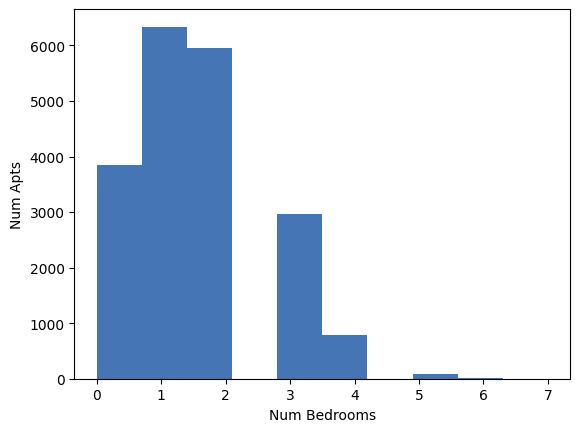

In [17]:
bookcolors = { # our usual book color palette
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'}
fig,ax = plt.subplots()
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bedrooms, color=bookcolors['blue'])
plt.show()

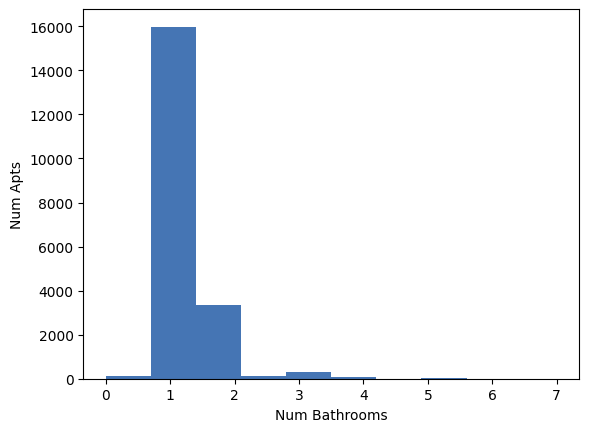

In [18]:
bookcolors = { # our usual book color palette
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'}
fig,ax = plt.subplots()
ax.set_xlabel('Num Bathrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bathrooms, color=bookcolors['blue'])
plt.show()

In [24]:
print(f"There are {len(df[(df.longitude==0.0) & (df.latitude==0.0)])} apartments at location 0,0")




There are 5 apartments at location 0,0


 the region of New York City containing two apartments over $1,000,000, we see other apartments with the same characteristics but with reasonable prices

In [20]:
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
           (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
9128,1,1.0,300 West 55th Street,2400


In [25]:
# filter all records (training/testing)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]

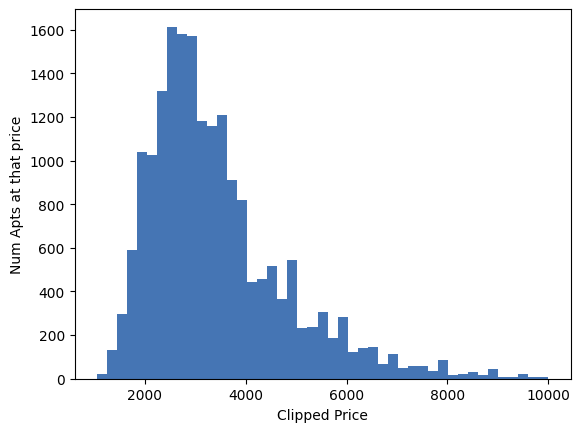

In [26]:
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_clean.price, bins=45, color=bookcolors['blue'])
plt.show()

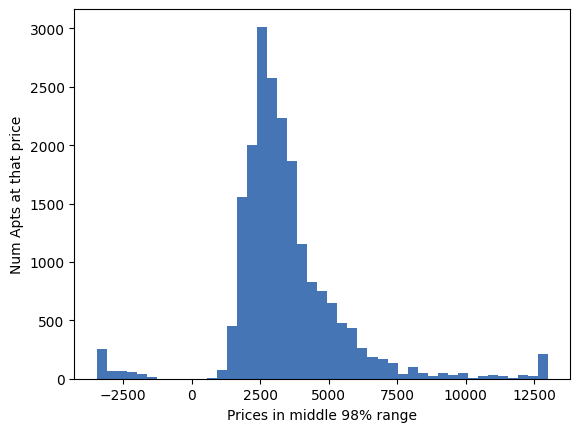

In [27]:
upper, lower = np.percentile(df.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')
ax.hist(clipped, bins=45, color=bookcolors['blue'])
plt.show()

#deleting records outside newyork city 
- handling missing value, replacing longitude and lattitude using mean value

In [28]:
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
print(len(df_missing))

4


In [29]:
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]


In [30]:
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]

### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [31]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,        # parallelize
                           oob_score=True)   # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.7940


MAE calculation for df_clean dataset

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Separate features and target variable
X, y = df_clean.drop('price', axis=1), df_clean['price']

errors = []
print(f"Validation MAE trials:", end='')

# Iterate the model for 10 iterations
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
    
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")


Validation MAE trials: $395 $398 $406 $420 $410 $401 $412 $400 $407 $405
Average validation MAE $405


Lasso model to improve accuracy

In [33]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = Lasso(alpha=0.5) # create linear model
lm.fit(X_train, y_train)
print(f"LM Training score {lm.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm.score(X_test, y_test):.4f}")

LM Training score 0.5814
LM Validation score 0.5504


GB training score

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

GB Training score 0.8691
GB Validation score 0.7840


Given the  and MAE scores from our RF model and that model's favorable comparison to other models, it's reasonable to declare victory over this problem. Our solution comes from cleaning the data to make life easier on the model, rather than choosing the right model on the raw data set.

How much we care about cleaning up the data depends on the model we're using and whether the offending values are in predictor variables (features) or the target. One of the advantages of RFs is that they deal gracefully with errors and outliers in the predictor variables. RFs behave like nearest-neighbor models and feature outliers are partitioned off into lonely corners of the feature space automatically. Anomalous values in the target variable are also not a problem, unless they lead to inconsistencies, samples with the same or similar feature vectors but huge variation in the target values. No model deals well with inconsistent training data.

The inconsistencies in this apartment data set stem from the outliers: the extreme apartment rent prices seen in the target variable. That's why snipping out those records as “don't cares” improves model performance, but there's a final trick that you should know about that hammers down those extreme values.

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

where we've examined the data and done a lot a little “nip and tuck” operations. Now, we're going to perform a single cleaning transformation and get decent accuracy, all without having to look at the data and without New York City apartment domain expertise.

In [37]:
np.mean(df_local.price)

2400.0

In [38]:
np.mean(np.log(df_local.price))

7.783224016336037

#replaced df_num with df_claen

In [40]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
y_log = np.log(y) # apply log to each price

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y_log)
log_oob_r2 = rf.oob_score_
print(f"OOB R^2 score for log(price) {log_oob_r2:.4f}")

OOB R^2 score for log(price) 0.8229


In [41]:
y_predicted_log = rf.predict(X_test)
y_predicted = np.exp(y_predicted_log)


### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
|  example problem 1  | example explanation    | example fix  | example explanation about why this fix is appropriate   |
|  example problem 2  | example explanation    | example fix  | example explanation about why this fix is appropriate   |


Certainly, here's a breakdown of the data issues discovered in the code and explanations for why they were problematic and how they were addressed:

**Data Issue 1: Inconsistent Location Data**

* **Why is this a problem?**
    - Data points with invalid location coordinates (latitude and longitude both zero) represent nonsensical locations and can mislead the model. 
    - Including such data can negatively impact the model's ability to learn the relationship between features (e.g., number of bedrooms) and price based on actual locations.

* **How did they fix it?**
    - The code identified and filtered out apartments with zero latitude and longitude values using:
        ```python
        df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]
        ```

* **Why is this fix appropriate?**
    - Removing data points with invalid locations eliminates nonsensical outliers that could distort the model's understanding of how features relate to price in real geographic locations.
    - This helps the model focus on learning patterns from apartments with valid locations.

**Data Issue 2: Outlier Price Values**

* **Why is this a problem?**
    - Extreme price values (e.g., apartments exceeding $1 million) can be outliers that significantly skew the model's predictions. 
    - The model might prioritize these outliers during training, leading to inaccurate predictions for more typical apartments.

* **How did they fix it?**
    - The code created a subset (`df_clean`) containing only data points with prices between a reasonable range ($1,000 and $10,000). This was achieved using:
        ```python
        df_clean = df_clean[(df_clean.price>1_000) & (df_clean.price<10_000)]
        ```

* **Why is this fix appropriate?**
    - By removing extreme price outliers, the model is trained on a dataset that better reflects the typical range of apartment rents in the target area. 
    - This helps the model learn more accurate relationships between features and prices for more common apartment types.

These are the two main data issues addressed in the provided code. It's important to note that data cleaning is an iterative process, and there might be other data quality issues depending on the specific dataset.
